# Tesseract OCR

Murilo Kenichiro Senaga, 10395789

## 1. O que é?  
O Tesseract é um software de reconhecimento óptico de caracteres (OCR) de código aberto, projetado para converter imagens de texto em texto editável, permitindo que documentos digitalizados sejam transformados em formatos que podem ser facilmente manipulados e pesquisados. O Tesseract é amplamente utilizado em aplicações que necessitam de extração de texto a partir de imagens, como digitalização de documentos, leitura de placas e reconhecimento de texto em fotos.

## 2. História do Tesseract
O Tesseract foi desenvolvido originalmente na Hewlett-Packard Laboratories Bristol UK e na Hewlett-Packard Co, Greeley Colorado USA entre 1985 e 1994, com mais algumas mudanças feitas em 1996 para portar para o Windows. Em 2005, o Tesseract foi aberto pela HP e foi desenvolvido pelo Google de 2006 até novembro de 2018. Atualmente, o projeto está hospedado no GitHub e é mantido por uma comunidade ativa de desenvolvedores. O projeto ganhou notoriedade por sua capacidade de lidar com diferentes tipos de fontes e layouts, tornando-se uma ferramenta valiosa para desenvolvedores e empresas que trabalham com processamento de documentos.


## 3. Funcionamento:
O Tesseract OCR realiza o reconhecimento de texto em imagens em várias etapas sequenciais, desde a identificação de linhas de texto até a classificação adaptativa de caracteres.

### Etapas do Processo de Reconhecimento
### 3.1 Filtragem de Blobs
Inicialmente, o Tesseract identifica "blobs", que são regiões conectadas de pixels representando caracteres ou partes deles. Blobs muito grandes ou sobrepostos são eliminados, e os restantes são organizados por coordenadas para formar linhas de texto. Em seguida, o método da menor mediana dos quadrados é utilizado para ajustar as linhas de base, mesmo em páginas inclinadas, permitindo mesclar blobs horizontalmente e formar palavras completas.

### 3.2 Ajuste de Linhas de Base
O Tesseract aplica uma spline quadrática às linhas de base para lidar com irregularidades, como texto curvado em documentos escaneados. Isso permite o alinhamento correto dos blobs, essencial para que as linhas de texto sejam reconhecidas independentemente de eventuais curvaturas.

![curved fitted baseline](fig_1.png)

### 3.3 Detecção de Largura Fixa e Proporcional
Para linhas de largura fixa, o algoritmo usa o espaçamento uniforme entre caracteres para segmentar as palavras em caracteres individuais. Em textos proporcionais, onde o espaçamento varia, o Tesseract analisa os espaços entre caracteres em uma faixa limitada, garantindo a segmentação correta mesmo com espaçamentos variados.

![A fixed-pitch chopped word](fig_2.png)
![Some difficult word spacing](fig_3.png)

### 3.4 Detecção de Linhas e Palavras
O Tesseract identifica as linhas e palavras com precisão. Para isso, os blobs que representam linhas de texto são ajustados com uma spline quadrática para lidar com curvaturas. Em textos de espaçamento fixo, as palavras são segmentadas em caracteres logo após essa etapa. Em textos proporcionais, a análise do espaçamento permite a identificação exata dos caracteres.

### 3.5 Segmentação e Reconhecimento de Palavras
Com as linhas e palavras identificadas, o algoritmo segmenta as palavras em caracteres. O "chopper" separa caracteres unidos e, quando necessário, o "associator" combina partes fragmentadas para formar caracteres completos.

![Candidate chop points and chop.](fig_4.png)
![An easily recognized word](fig_5.png)

### 3.6 Classificação de Caracteres
O processo de reconhecimento envolve um classificador de caracteres estático, que utiliza características geométricas como posição e ângulo para diferenciar os caracteres. Este classificador é treinado com base em um número limitado de amostras, mas é eficiente mesmo para caracteres danificados. A classificação ocorre em duas etapas: uma pré-classificação inicial, que gera uma lista de possíveis caracteres, seguida por uma classificação refinada.

![(a) Pristine ‘h, (b) broken ‘h’, (c) features matched to prototypes](fig_6.png)

### 3.7 Análise Linguística
Após a segmentação, o Tesseract realiza uma análise linguística para verificar a frequência e a compatibilidade das palavras com o dicionário e regras gramaticais. Isso aumenta a precisão do OCR, especialmente ao interpretar palavras que fazem sentido no contexto do documento.

### 3.8 Classificador Adaptativo
Além do classificador estático, o Tesseract utiliza um classificador adaptativo, que é ajustado dinamicamente para se adaptar melhor à fonte específica do documento. Isso melhora a precisão, especialmente em textos com fontes variadas ou danificadas.

![Baseline and moment normalized letters](fig_7.png)

### 3.9 Resultados
Combinando todas essas técnicas, o Tesseract pode reconhecer uma variedade de estilos tipográficos e lidar com espaçamentos variados e caracteres danificados. As análises linguística e adaptativa tornam o Tesseract uma ferramenta eficaz para OCR, mesmo em documentos escaneados sem alinhamento perfeito ou com fontes diferentes.


# Tutorial Tesseract OCR

### 1. Instalação do Tesseract

Para usar o Tesseract OCR, primeiro é preciso instalá-lo em seu sistema. Existem duas partes principais para configurar o Tesseract OCR: 

- Instalar o binário do Tesseract (aplicação principal).
- Instalar a biblioteca Python `pytesseract` que permite interagir com o Tesseract no Python.

#### 1.1 Instalando o Tesseract

##### No Ubuntu/Linux:

```sh
!sudo apt-get update
!sudo apt-get install tesseract-ocr
```

##### No Windows:

- Faça o download do instalador do Tesseract no github tesseract-ocr: https://github.com/UB-Mannheim/tesseract/wiki.
- Siga as instruções de instalação e certifique-se de adicionar o caminho do Tesseract ao PATH do Windows.

#### 1.2 Instalando o pytesseract

Execute o seguinte comando para instalar a biblioteca `pytesseract`:

In [1]:
!pip install pytesseract
!pip install Pillow  # Biblioteca necessária para manipular imagens


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


### 2. Importando as Bibliotecas

Depois de instalar tudo, você pode importar as bibliotecas necessárias. Certifique-se de definir o caminho do executável do Tesseract.

In [2]:
import pytesseract
from PIL import Image
import matplotlib.pyplot as plt

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

### 3. Carregando uma Imagem

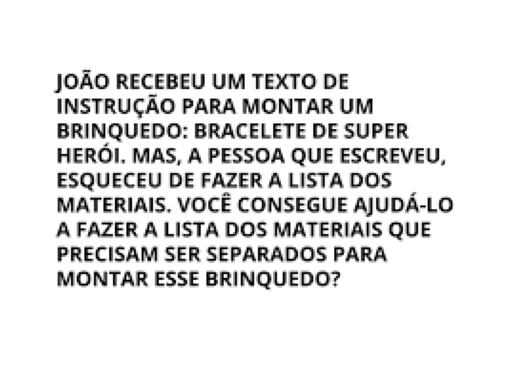

In [3]:
image_path = 'exemplo_1.png'  
image = Image.open(image_path)

plt.imshow(image)
plt.axis('off')
plt.show()

### 4. Extraindo Texto com o Tesseract OCR

Vamos agora usar o `pytesseract` para extrair o texto da imagem.

Para ler um texto de uma língua especifica, é preciso fazer o download em `https://github.com/tesseract-ocr/tessdata/tree/main`.
No caso do português, faça o download do arquivo `por.traineddata` e coloque o arquivo na pasta `tessdata` de sua maquina.

In [4]:
texto_extraido = pytesseract.image_to_string(image, lang='por')  # 'por' é o código para o idioma Português
print("Texto extraído:")
print(texto_extraido)

Texto extraído:
JOÃO RECEBEU UM TEXTO DE
INSTRUÇÃO PARA MONTAR UM
BRINQUEDO: BRACELETE DE SUPER
HERÓI. MAS, A PESSOA QUE ESCREVEU,
ESQUECEU DE FAZER A LISTA DOS —
MATERIAIS. VOCÊ CONSEGUE AJUDÁ-LO
A FAZER A LISTA DOS MATERIAIS QUE
PRECISAM SER SEPARADOS PARA
MONTAR ESSE BRINQUEDO?



### 5. Extraindo Texto de uma Área Específica da Imagem

Caso queira extrair texto de uma área específica da imagem, você pode cortar essa área usando a biblioteca `Pillow` antes de aplicar o OCR.

Imagem original:


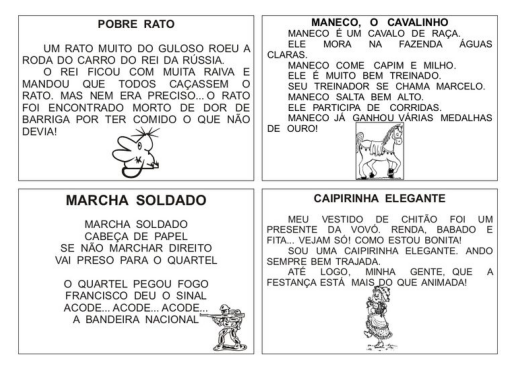

Imagem da área específica:


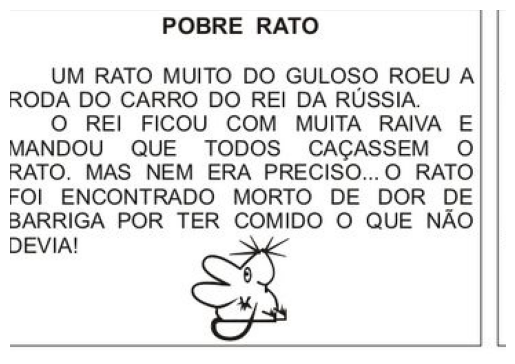

Texto da área específica:
POBRE RATO

UM RATO MUITO DO GULOSO ROEU A
RODA DO CARRO DO REI DA RÚSSIA.

O REI FICOU COM MUITA RAIVA E
VMANDOU QUE TODOS CAÇASSEM O
RATO. MAS NEM ERA PRECISO...O RATO
FOIl ENCONTRADO MORTO DE DOR DE
BARRIGA POR TER COMIDO O QUE NÃO
DEVIA!




In [5]:
image_path = 'exemplo_2.jpg'  
image = Image.open(image_path)
print("Imagem original:")
plt.imshow(image)
plt.axis('off')
plt.show()

area_especifica = image.crop((20, 10, 380, 260)) # coordenadas: (esquerda, cima, direita, baixo)

print("Imagem da área específica:")
plt.imshow(area_especifica)
plt.axis('off')
plt.show()

texto_area = pytesseract.image_to_string(area_especifica, lang='por')
print("Texto da área específica:")
print(texto_area)

### 6. Convertendo para Outros Formatos

Podemos usar outras funções do `pytesseract` para extrair informações adicionais, como caixas delimitadoras e os dados brutos do OCR.

#### 6.1 Extraindo Dados Estruturados

Dados estruturados referem-se a informações organizadas em um formato padronizado, facilitando o acesso e a interpretação automatizada, especialmente em operações de análise de dados.

- **level**: representa o nível hierárquico dos elementos (como páginas, blocos, parágrafos, linhas e palavras) extraídos pelo OCR.
- **page_num**: indica o número da página onde o elemento foi detectado.
- **block_num**: representa blocos de texto na página, permitindo a identificação de agrupamentos.
- **par_num**: indica o número do parágrafo dentro de um bloco.
- **line_num**: indica a linha dentro de um parágrafo.
- **word_num**: representa a posição de uma palavra específica na linha.
- **left**, **top**, **width**, **height**: coordenadas e dimensões da caixa delimitadora de cada elemento detectado (útil para saber a localização exata do texto na imagem).
- **conf**: nível de confiança do OCR para a palavra ou caractere extraído, variando de 0 a 100, onde valores mais altos indicam maior confiança.
- **text**: contém o texto reconhecido.

Esse formato estruturado facilita a interpretação dos dados, permitindo, por exemplo, identificar e extrair apenas palavras com alta confiança ou que estejam em uma posição específica da página.

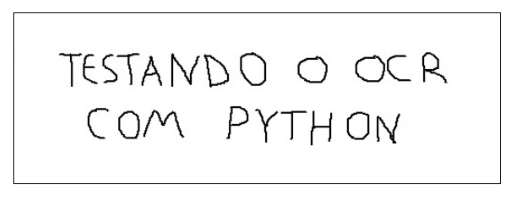

Dados Estruturados:
{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 2, 3, 4, 5, 5, 5, 4, 5, 5, 2, 3, 4, 5, 2, 3, 4, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5], 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1], 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 2, 3, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 1], 'left': [0, 4, 4, 4, 4, 4, 4, 4, 4, 58, 58, 58, 58, 340, 409, 92, 92, 256, 4, 4, 4, 4, 580, 580, 580, 580], 'top': [0, 4, 4, 4, 4, 4, 4, 4, 4, 51, 51, 51, 51, 56, 51, 115, 117, 115, 206, 206, 206, 206, 4, 4, 4, 4], 'width': [587, 577, 577, 577, 577, 1, 1, 1, 1, 459, 459, 459, 245, 36, 108, 370, 114, 206, 577, 577, 577, 577, 1, 1, 1, 1], 'height': [214, 1, 1, 1, 1, 203, 203, 203, 203, 110, 110, 42, 42, 32, 37, 46, 37, 46, 1, 1,

In [6]:
image_path = 'exemplo_3.png'  
image = Image.open(image_path)
plt.imshow(image)
plt.axis('off')
plt.show()

dados_estruturados = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
print("Dados Estruturados:")
print(dados_estruturados)

#### 6.2 Extraindo Caixas Delimitadoras

Caixas delimitadoras (ou bounding boxes) são regiões definidas por coordenadas que circundam elementos específicos em uma imagem, permitindo identificar e localizar texto dentro dela. Essas caixas são usadas para indicar a área onde uma palavra foi detectado. Cada caixa delimitadora é descrita por um conjunto de valores que representam suas coordenadas e dimensões `~ left top right bottom conf`.

In [7]:
caixas = pytesseract.image_to_boxes(image)
print("Caixas Delimitadoras:")
print(caixas)

Caixas Delimitadoras:
~ 4 209 581 210 0
~ 4 7 5 210 0
T 58 122 85 162 0
E 86 125 104 161 0
S 109 124 153 162 0
T 142 121 166 163 0
A 156 123 180 158 0
N 191 122 225 162 0
D 229 121 259 160 0
O 272 123 303 163 0
G 340 126 376 158 0
O 362 126 376 158 0
O 409 128 444 160 0
C 446 129 475 160 0
R 488 126 517 163 0
C 92 60 117 97 0
O 128 60 154 94 0
M 158 62 206 95 0
P 256 60 282 99 0
Y 290 56 317 96 0
T 321 59 351 94 0
H 356 53 381 94 0
O 399 59 425 92 0
N 434 55 462 90 0
~ 4 7 581 8 0
~ 580 7 581 210 0



#### 6.3 Visualizar Caixas Delimitadoras:

Para visualizar essas caixas na imagem para ver onde o Tesseract detectou os caracteres:

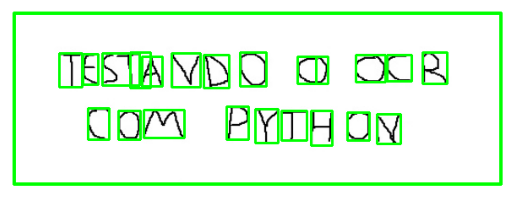

In [8]:
import cv2
import numpy as np

# Converte a imagem em um formato que o OpenCV possa usar
imagem_cv = np.array(image)
imagem_cv = cv2.cvtColor(imagem_cv, cv2.COLOR_RGB2BGR)

altura = imagem_cv.shape[0]
for caixa in caixas.splitlines(): # Desenhar as caixas delimitadoras
    caixa = caixa.split(' ')
    x, y, w, h = int(caixa[1]), int(caixa[2]), int(caixa[3]), int(caixa[4])
    y = altura - y
    h = altura - h
    cv2.rectangle(imagem_cv, (x, h), (w, y), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(imagem_cv, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### 7. Conclusão

O Tesseract OCR é uma ferramenta poderosa e útil para reconhecer texto em imagens. Ele se destaca tanto pela precisão quanto por ser de código aberto, o que permite amplas possibilidades de personalização. Foi possível observar a eficácia do Tesseract em diversas situações de extração de texto, especialmente quando é aplicado técnicas de pré-processamento de imagem. No entanto, é importante ressaltar que a qualidade do OCR depende muito da resolução e da nitidez da imagem, sendo recomendável otimizar as imagens antes do processamento. No geral, o Tesseract continua sendo uma ótima solução para projetos que precisam de OCR, especialmente por sua comunidade ativa que permite estar sempre trazendo melhorias para o projeto.

# Referencias

https://github.com/alvintree/Tesseract-models-for-historic-prints
https://tesseract-ocr.github.io/docs/das_tutorial2016/1Intro-history.pdf  
https://tesseract-ocr.github.io/docs/tesseracticdar2007.pdf  
https://github.com/tesseract-ocr/tessdoc  
https://pypi.org/project/pytesseract/  
https://www.linkedin.com/pulse/reconhecimento-de-caracteres-em-imagens-com-e-python-medeiros-2f/?published=t